<a href="https://colab.research.google.com/github/radhika3131/Deep_Learning_with_Python/blob/main/ch_06_working_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different ways to build keras models
1. the sequential model - a python list , its limited to simple stack of layers
2. Fuctional API - focuses on graph like model architecture.
3. Model subclassing - you write everything yourself from scratch , you wo'nt have access to built in features of keras.

.
#The Sequential model
simplest way to build keras model is to use sequential model 
Can only express model which has single input and single output

**The Sequential class**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
]) 
# now its possible to build the same model incrementally via add method

In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

the shape of the layers weight depends on the shape of their input: until input shape is known , they can'nt be created

as tgis sequential model does'nt have any weights so call its **build()** metod with input shape

In [4]:
model.build(input_shape=(None, 3))# now we can retrieve model weight ,None in te input signals that the batch size could be anything
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.23451692,  0.29499352,  0.01883072,  0.04165083,  0.29276478,
         -0.10065481,  0.13216534,  0.28997606,  0.137606  ,  0.13968328,
         -0.19770858,  0.01153409, -0.01569915,  0.11905873,  0.28038454,
         -0.14941771, -0.13278198, -0.1881598 , -0.01248637,  0.15127823,
         -0.07627539,  0.26316434,  0.0975365 , -0.2386361 ,  0.1072481 ,
          0.05478105, -0.2495786 , -0.01555431,  0.24314839, -0.16593179,
         -0.10864194,  0.05606616,  0.15309939,  0.20309776,  0.201684  ,
         -0.17891344, -0.09757182,  0.13417625, -0.2355845 ,  0.2817074 ,
          0.11279622, -0.09169814, -0.06183688, -0.21881837, -0.14073287,
         -0.01433191,  0.19601807, -0.15597518, -0.12495625, -0.00677231,
         -0.08310199,  0.1505953 ,  0.27650195, -0.01983765, -0.14311609,
         -0.10496776,  0.05430681,  0.19718239,  0.25810248,  0.01203117,
          0.2935322 , -0.09698705,  0.12682

In [5]:
model.summary() # for displaying models content

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the name argument**

we can give names to everything in Keras - every model , every layer.

In [6]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


When building a Sequential model incrementally , it is useful to be able to print a sumary of what current model looks like after you add each layer . But you you can'nt print a summary until the  model is built. There is a actually a  way to have your sequential built on fly: just declare the shape of the models input in advance

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [8]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#The Functional API
A simple example

**A simple Functional model with two Dense layers**

In [9]:
inputs = keras.Input(shape=(3,), name="my_input") # this object holds information about the shape and the type of data model will process called as symbolic tensor
features = layers.Dense(64, activation="relu")(inputs) # recreated a layer and called it on the inputs
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [11]:
inputs = keras.Input(shape=(3,), name="my_input")
inputs.shape
inputs.dtype
features = layers.Dense(64, activation="relu")(inputs)
features.shape
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#Multi-input, multi-output models
**A multi-input, multi-output Functional model**

In [13]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body") # define model input
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags]) # combine input features into a single tensor , features by concatenating them
features = layers.Dense(64, activation="relu")(features) # apply an intermediate layer to recombne input features into richer representations

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(                           # define model output
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#Training a multi-input, multi-output model

You can train your mdle in much the same way as you would train a Sequential model , by calling fit() with list of input and output data .

These lists pf data should be in the same order as the inputs  you passedto the model constructor

**Training a model by providing lists of input & target arrays**

In [14]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 15ms/step


If you don't want to rely on input order (becz have to many inputs and outputs )
, you can also leverage the names you gave to the Input object and the output layers . and pass the data via dictionaries

**training a model by providing dicts of inputs and target arrays**

In [15]:
model.compile(optimizer = "rmsprop",
              loss = { "priority" : "mean_squared_error" , "department" : "categorical_crossentropy"},
              metrics = {"priority" : ["mean_absolute_error"] , "department" : ["accuracy"]}
              )

model.fit({"title" : title_data , "text_body" : text_body_data,
           "tags" : tags_data},
          {"priority" : priority_data , "department" : department_data  },epochs = 1)

model.evaluate( {"title" : title_data , "text_body" : text_body_data,
           "tags" : tags_data},
          {"priority" : priority_data , "department" : department_data   })

priority_preds , department_preds = model.predict(
              {"title":  title_data , "text_body" : text_body_data ,"tags" : tags_data }        )
    

40/40 [==============================] - 0s 9ms/step


**The power of the Functional API: Access to layer connectivity**

A functional model is an explicit graph data structure. Ths makes t possible to inspect how layers are connected and reuse previous graph nodes .This enables us two important use cases: 
1. model visalization
2. feature extraction

*You can plot functionLmodel as graph with the plot_model() utility

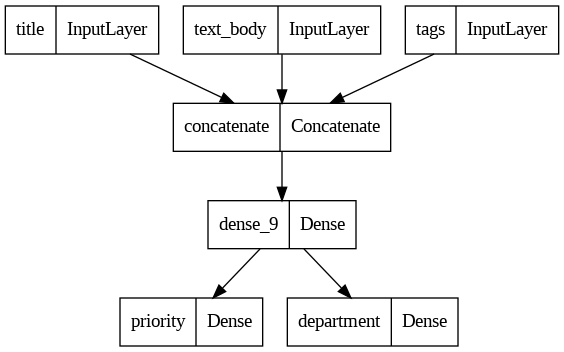

In [16]:
keras.utils.plot_model(model, "ticket_classifier.png")


 you can add to this plot the input and output shapes of eah layer

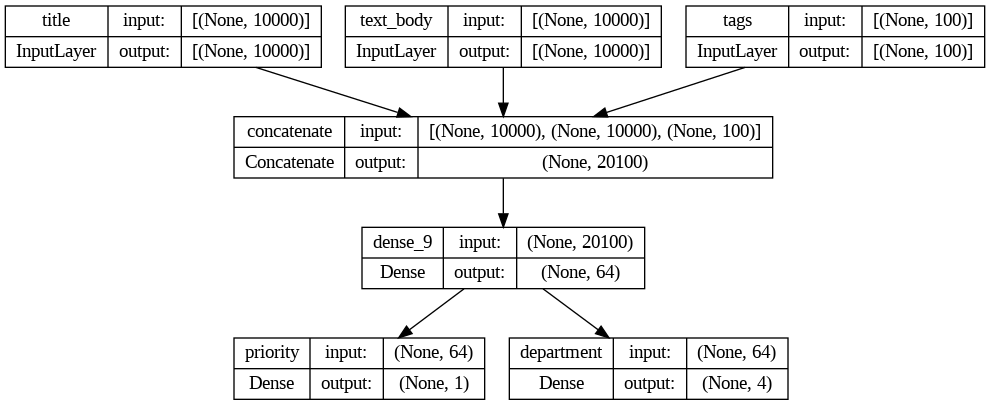

In [17]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

Access to layer connectivity also means that youcan inspect and reuse individual nodes in the graph . The **model.layers** model property provides the list of layers that make up the model , and for each layer you can query layer.input and layer.output

In [19]:
model.layers


In [20]:
model.layers[3].input
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

This enables us to do **feature extraction** creating model that reuse the intermediate features from another model 

Lets say you want to add another output to the previous model , you want to estimate how long a given issue ticket will take to resolve . You don'y neend to recreate or retrain a model from scratch . You can start from intermediate features from previous model

**Creating a new model by reusing intermediate layers output**

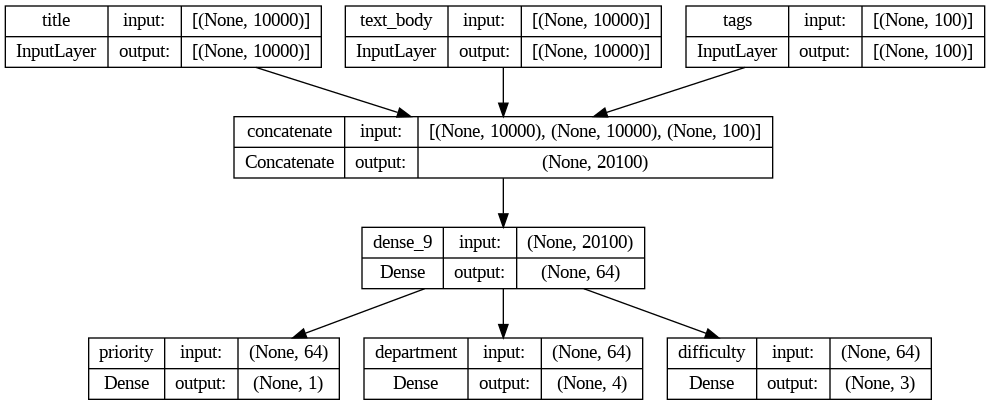

In [21]:
features = model.layers[4].output # layer[4] is our intermediate dense layer
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

In [ ]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [ ]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})